In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"D:\T3\archive\train_u6lujuX_CVtuZ9i.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df['Gender'] = df['Gender'].ffill()

In [9]:
df['Dependents'] = df['Dependents'].bfill()

In [10]:
df['Self_Employed'] = df['Self_Employed'].ffill()

In [11]:
df['LoanAmount'].median()

128.0

In [12]:
df['LoanAmount'] = df['LoanAmount'].fillna(128)

In [13]:
df['Loan_Amount_Term'].median()

360.0

In [14]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360)

In [15]:
df['Credit_History'] = df['Credit_History'].fillna(1)
#df['Credit_History'].median()

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df = df.dropna()

In [18]:
df.shape

(611, 13)

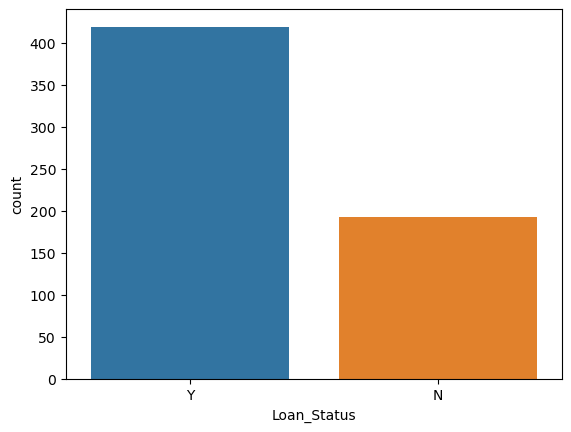

In [19]:

sns.countplot(data=df, x='Loan_Status')
plt.show()

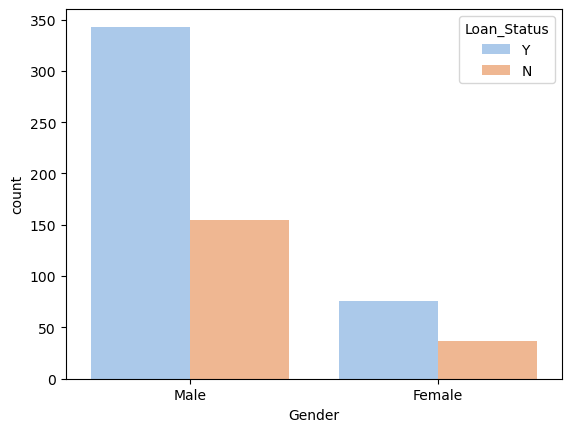

In [20]:

sns.countplot(data=df, x='Gender', hue='Loan_Status', palette='pastel')
plt.show()

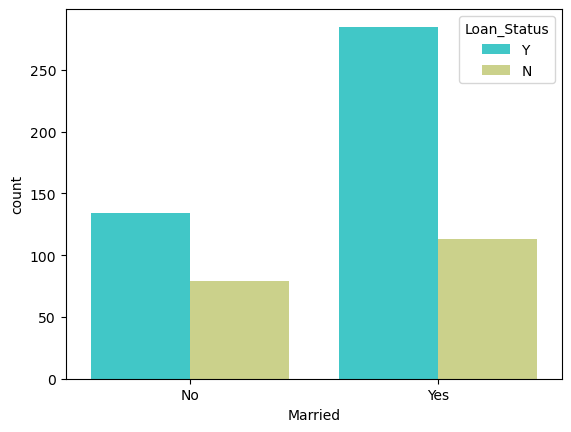

In [21]:

sns.countplot(data=df, x='Married', hue='Loan_Status', palette='rainbow')
plt.show()

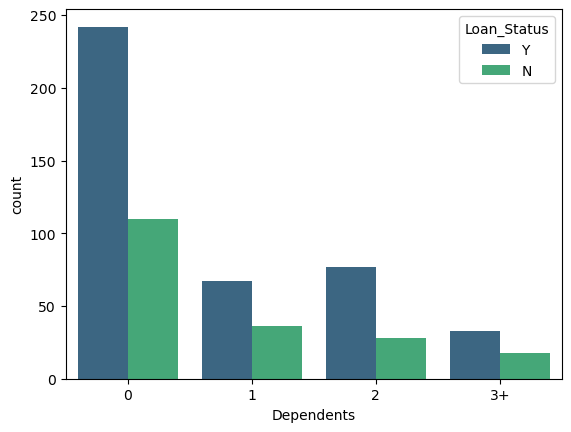

In [22]:

sns.countplot(data=df, x='Dependents', hue = 'Loan_Status', palette='viridis')
plt.show()

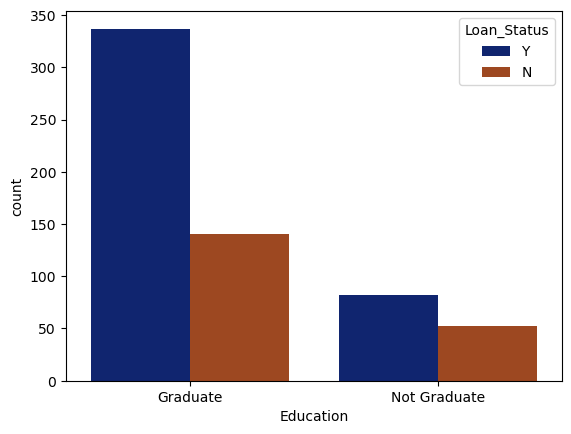

In [23]:

sns.countplot(data=df, x='Education', hue='Loan_Status', palette='dark')
plt.show()

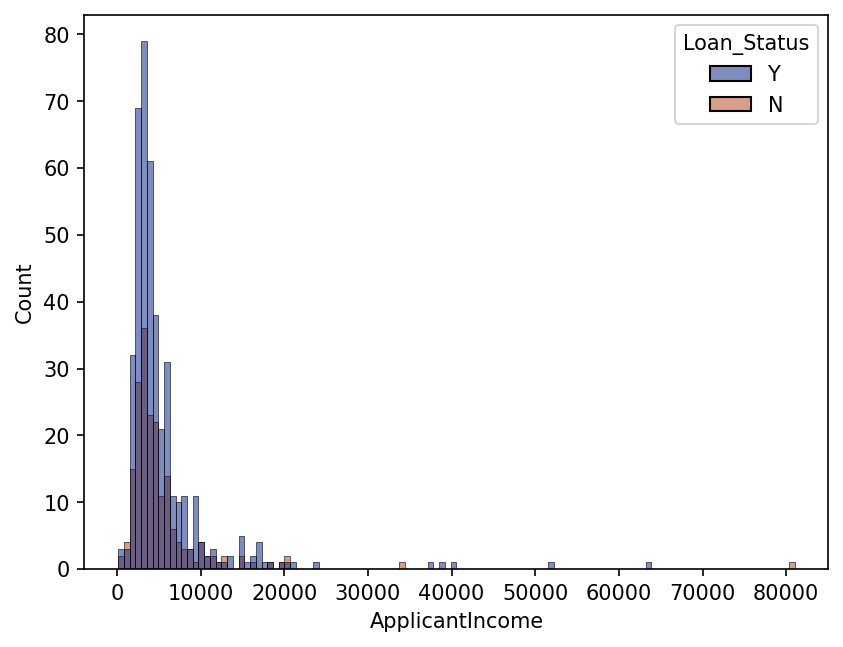

In [24]:
plt.figure(dpi =150)
sns.histplot(data=df, x='ApplicantIncome', hue='Loan_Status', palette='dark')
plt.show()

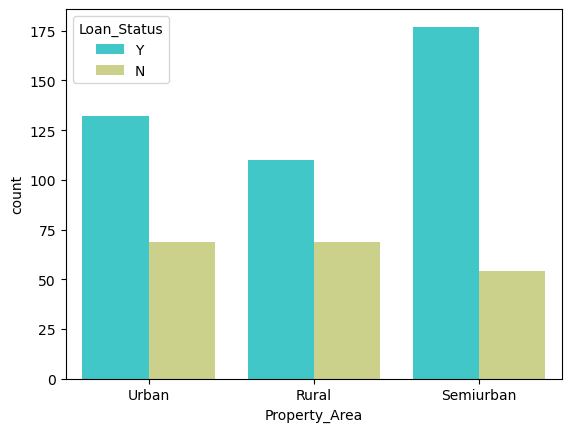

In [25]:
sns.countplot(data=df, x='Property_Area', hue='Loan_Status', palette='rainbow')
plt.show()

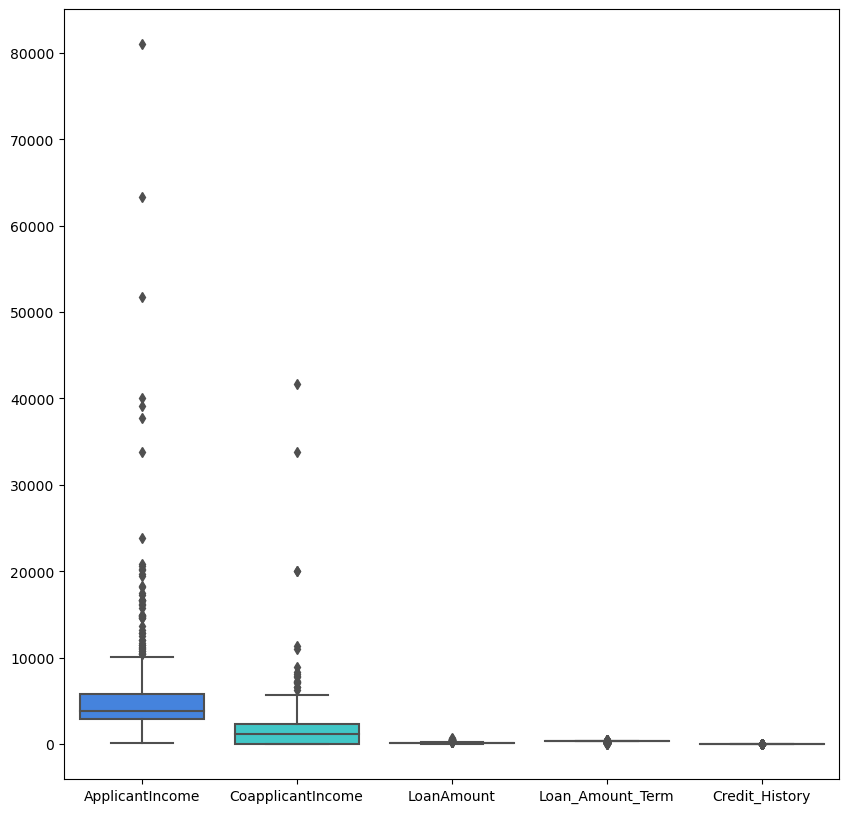

In [26]:

plt.figure(figsize=(10,10), dpi=100)
sns.boxplot(df, palette='rainbow')
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_4168\155487726.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='rainbow')


<Axes: >

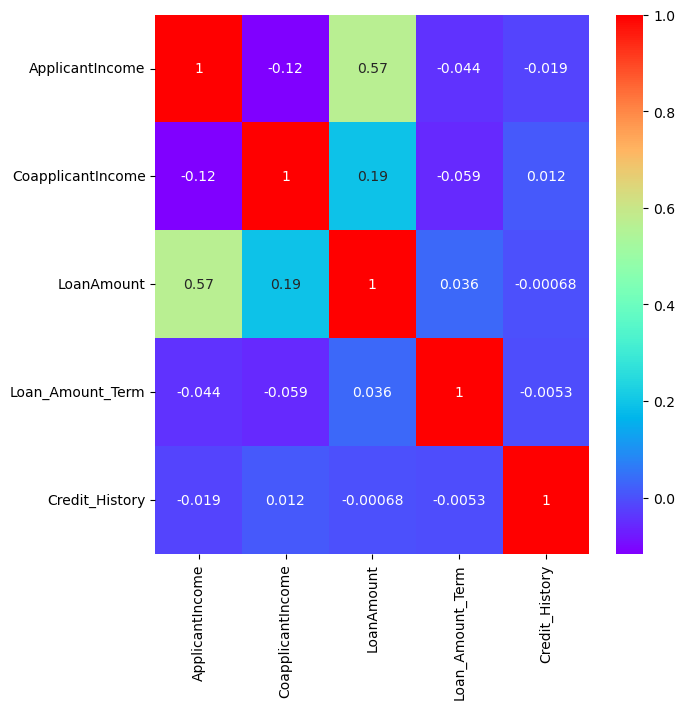

In [27]:
plt.figure(figsize=(7,7), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

In [28]:
df = df.drop(['Loan_ID'], axis =1)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      502
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
l_enc = LabelEncoder()
oenc = OneHotEncoder()

In [31]:
df['Dependents'] = l_enc.fit_transform(df['Dependents'])
df['Property_Area'] = l_enc.fit_transform(df['Property_Area'])
#df['Loan_Status'] = oenc.fit_transform(df['Loan_Status'])

In [32]:
df = pd.get_dummies(df, drop_first=True)

In [33]:
df.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Loan_Status_Y'],
      dtype='object')

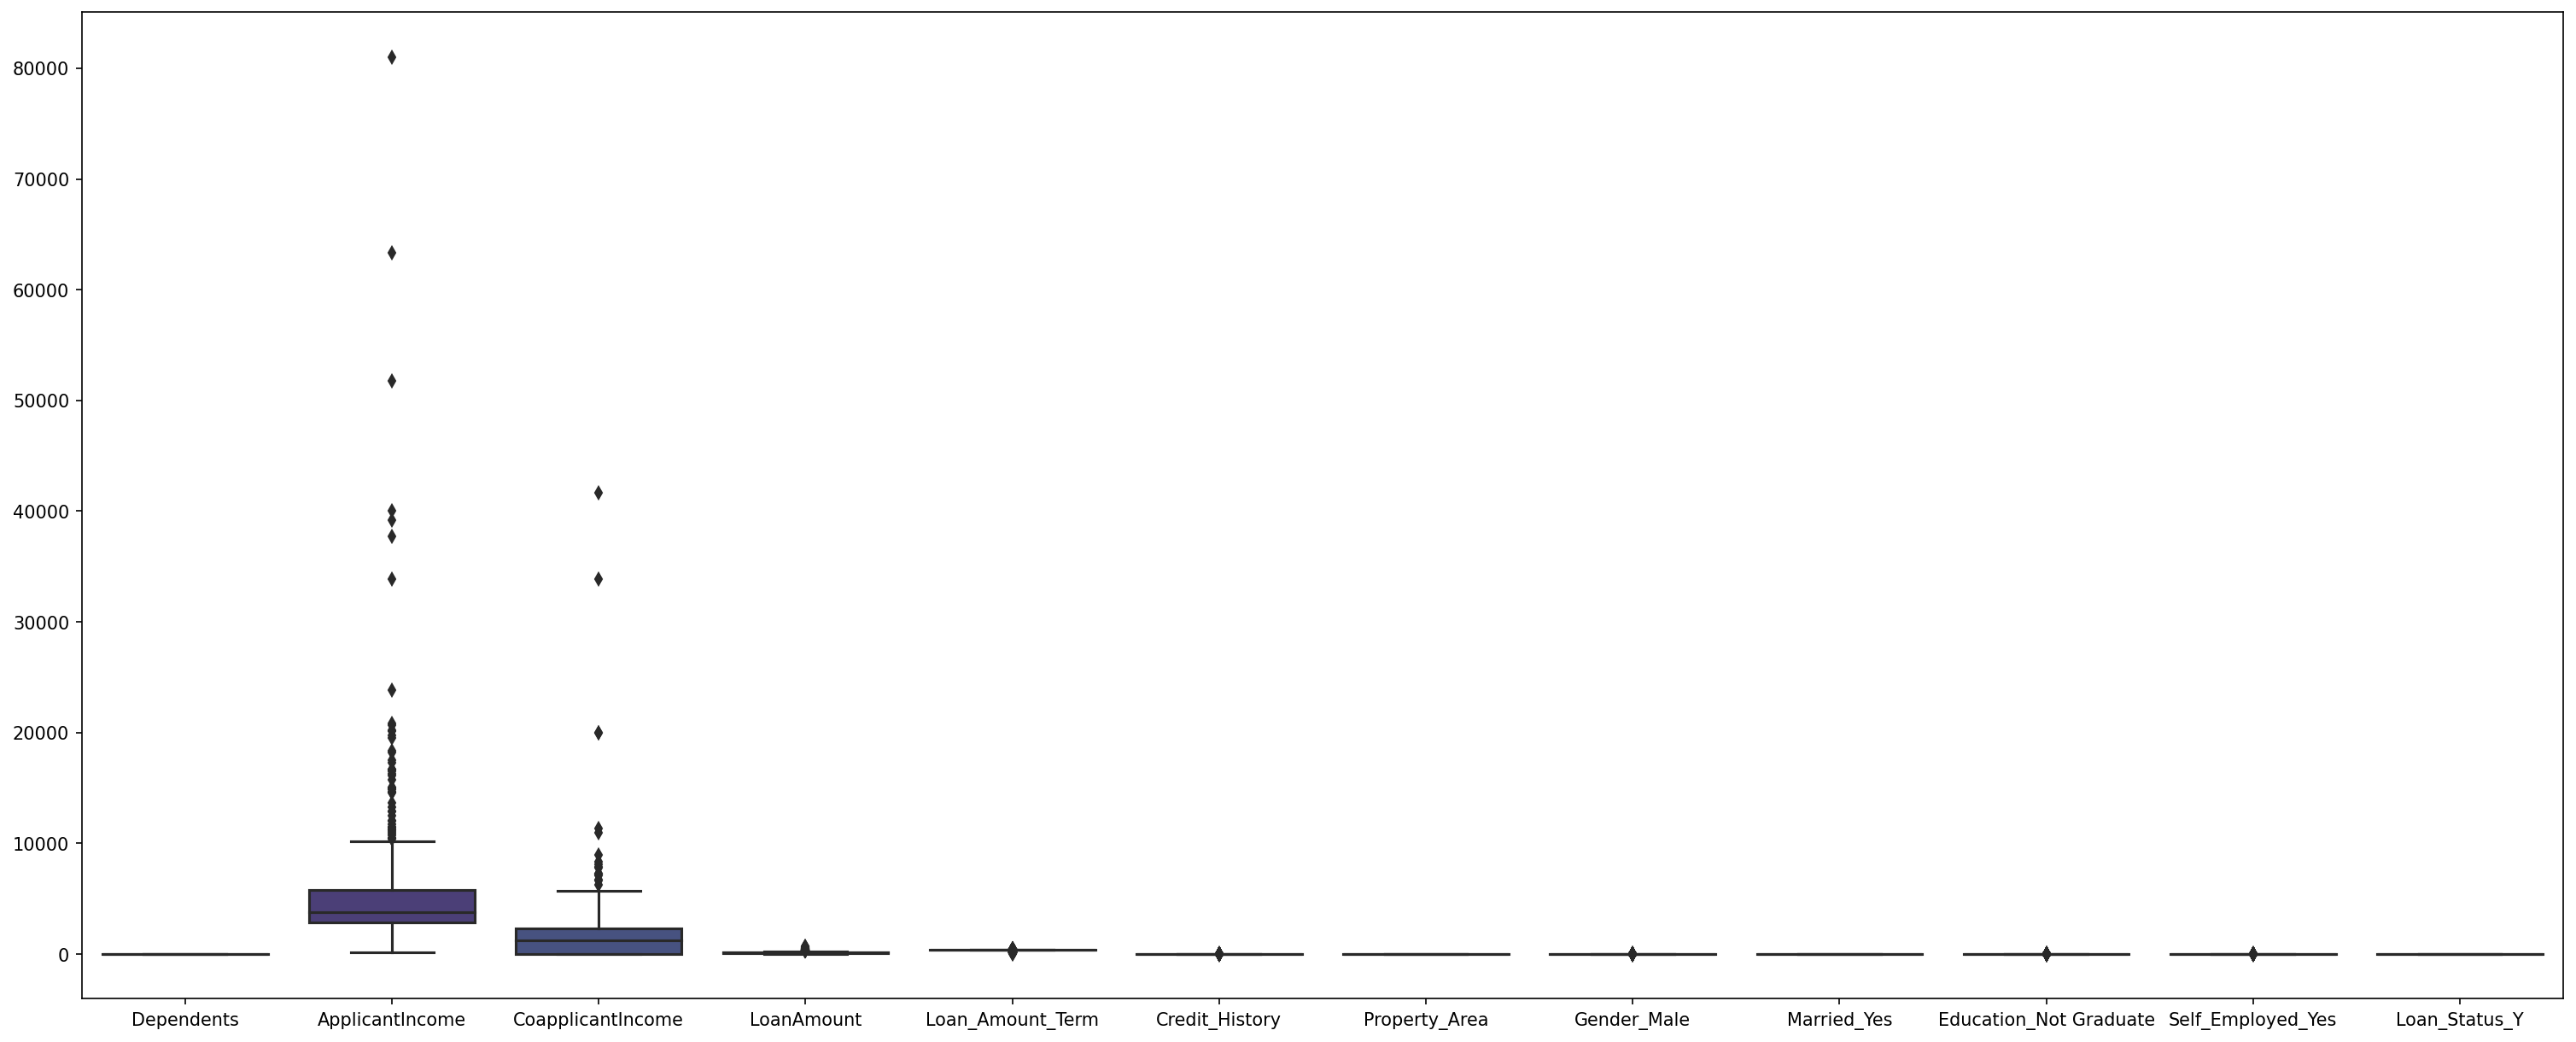

In [34]:
plt.figure(figsize=(25,10), dpi=150)
sns.boxplot(df, palette='viridis')
plt.show()

In [35]:
from scipy.stats import zscore

In [36]:
(df[(zscore(df['ApplicantIncome'])>3)|(zscore(df['ApplicantIncome'])<-3)])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
126,3,23803,0.0,370.0,360.0,1.0,0,0,1,0,0,1
155,3,39999,0.0,600.0,180.0,0.0,1,1,1,0,0,1
171,3,51763,0.0,700.0,300.0,1.0,2,1,1,0,0,1
183,1,33846,0.0,260.0,360.0,1.0,1,1,1,0,0,0
185,0,39147,4750.0,120.0,360.0,1.0,1,1,1,0,1,1
333,0,63337,0.0,490.0,180.0,1.0,2,1,1,0,0,1
409,3,81000,0.0,360.0,360.0,0.0,0,1,1,0,0,0
443,1,37719,0.0,152.0,360.0,1.0,1,1,0,0,0,1


In [37]:
(df[(zscore(df['CoapplicantIncome'])>3)|(zscore(df['CoapplicantIncome'])<-3)])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
9,1,12841,10968.0,349.0,360.0,1.0,1,1,1,0,0,0
177,3,5516,11300.0,495.0,360.0,0.0,1,1,1,0,0,0
402,0,2500,20000.0,103.0,360.0,1.0,1,1,0,0,0,1
417,2,1600,20000.0,239.0,360.0,1.0,2,1,1,0,1,0
581,0,1836,33837.0,90.0,360.0,1.0,2,1,0,0,0,0
600,3,416,41667.0,350.0,180.0,1.0,2,0,0,0,0,0


In [38]:
(df[(zscore(df['LoanAmount'])>3)|(zscore(df['LoanAmount'])<-3)])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
130,0,20166,0.0,650.0,480.0,1.0,2,1,0,0,1,1
155,3,39999,0.0,600.0,180.0,0.0,1,1,1,0,0,1
171,3,51763,0.0,700.0,300.0,1.0,2,1,1,0,0,1
177,3,5516,11300.0,495.0,360.0,0.0,1,1,1,0,0,0
278,0,14583,0.0,436.0,360.0,1.0,1,1,1,0,0,1
308,0,20233,0.0,480.0,360.0,1.0,0,1,0,0,0,0
333,0,63337,0.0,490.0,180.0,1.0,2,1,1,0,0,1
369,0,19730,5266.0,570.0,360.0,1.0,0,1,1,0,0,0
432,0,12876,0.0,405.0,360.0,1.0,1,1,0,0,0,1
487,1,18333,0.0,500.0,360.0,1.0,2,1,1,0,0,0


In [39]:
(df[(zscore(df['Loan_Amount_Term'])>3)|(zscore(df['Loan_Amount_Term'])<-3)])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y
14,2,1299,1086.0,17.0,120.0,1.0,2,1,1,0,0,1
68,3,7100,0.0,125.0,60.0,1.0,2,1,1,1,1,1
94,0,3620,0.0,25.0,120.0,1.0,1,1,0,1,0,1
133,0,3459,0.0,25.0,120.0,1.0,1,1,1,0,1,1
242,0,2965,5701.0,155.0,60.0,1.0,2,1,0,0,0,1
262,1,3481,0.0,155.0,36.0,1.0,1,0,0,0,0,0
313,2,5746,0.0,144.0,84.0,1.0,0,1,1,0,1,1
495,1,3326,913.0,105.0,84.0,1.0,1,0,1,0,0,1
497,0,4625,2857.0,111.0,12.0,1.0,2,1,1,0,0,1
546,0,3358,0.0,80.0,36.0,1.0,1,1,0,1,0,0


In [40]:
(df[(zscore(df['Credit_History'])>3)|(zscore(df['Credit_History'])<-3)])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y


In [41]:
(df[(zscore(df['Credit_History'])>3)|(zscore(df['Credit_History'])<-3)])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Status_Y


In [42]:
x = df.drop('Loan_Status_Y', axis=1)
y = df['Loan_Status_Y']

In [43]:
y.value_counts()

1    419
0    192
Name: Loan_Status_Y, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)
x_train.shape, x_test.shape

((427, 11), (184, 11))

In [46]:
from imblearn.combine import SMOTETomek

In [47]:
smpl = SMOTETomek()

In [48]:
x_train_os, y_train_os = smpl.fit_resample(x_train, y_train)


In [49]:
y_train_os.value_counts()

0    241
1    241
Name: Loan_Status_Y, dtype: int64

In [50]:
from sklearn.preprocessing import RobustScaler

In [51]:
from sklearn.compose import ColumnTransformer


In [52]:
df.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Loan_Status_Y'],
      dtype='object')

In [53]:
transform = ColumnTransformer(transformers=[
    ('c1', RobustScaler(),['ApplicantIncome']),
    ('c2',RobustScaler(),['CoapplicantIncome']),
    ('c3',RobustScaler(),['LoanAmount']),
    ('c4',RobustScaler(),['Loan_Amount_Term']),
],remainder = 'passthrough')

In [54]:
x_train_scl = transform.fit_transform(x_train_os)
x_test_scl = transform.fit_transform(x_test)

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [61]:
lor_mdl = lor.fit(x_train_scl, y_train_os)
lor_mdl

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
lor_y_pred = lor_mdl.predict(x_test_scl)
lor_y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0], dtype=uint8)

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score

In [64]:
accuracy_lor = accuracy_score(lor_y_pred, y_test)
accuracy_lor

0.717391304347826

In [65]:
cm = confusion_matrix(lor_y_pred, y_test)
cm

array([[ 26,  24],
       [ 28, 106]], dtype=int64)

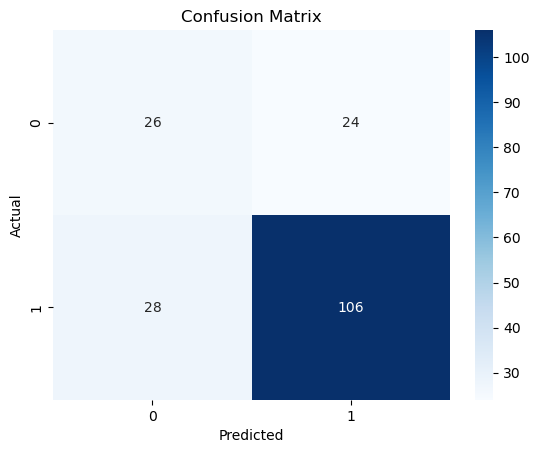

In [67]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
report = classification_report(lor_y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        50
           1       0.82      0.79      0.80       134

    accuracy                           0.72       184
   macro avg       0.65      0.66      0.65       184
weighted avg       0.72      0.72      0.72       184



In [69]:
fpr, tpr, _ = (roc_curve(lor_y_pred, y_test))

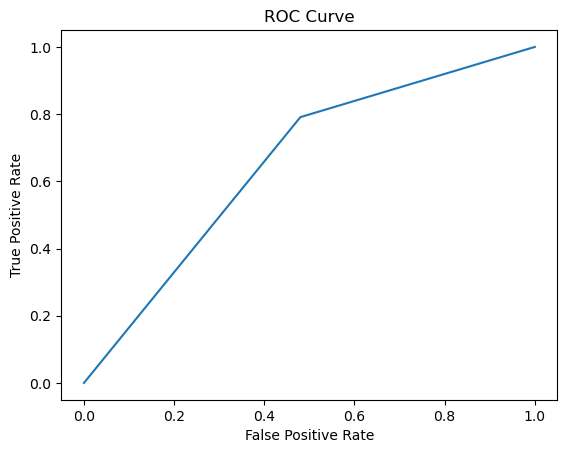

In [70]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [72]:
dt_mdl = dt.fit(x_train_scl, y_train_os)
dt_mdl

DecisionTreeClassifier()

In [73]:
dt_y_pred = dt_mdl.predict(x_test_scl)
dt_y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0], dtype=uint8)

In [74]:
accuracy_score_dt = accuracy_score(dt_y_pred, y_test)
accuracy_score_dt 

0.6358695652173914

In [75]:
cm = confusion_matrix(dt_y_pred, y_test)

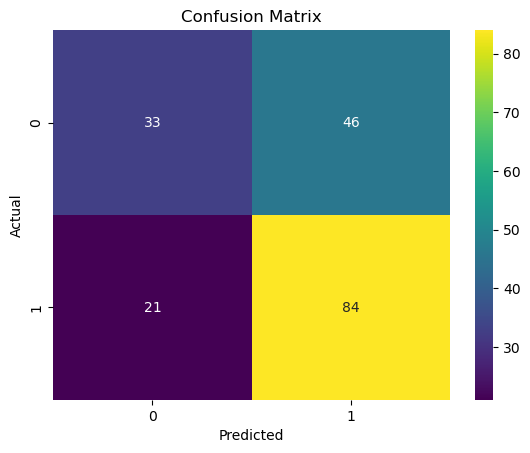

In [76]:
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [77]:
print(classification_report(dt_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.61      0.42      0.50        79
           1       0.65      0.80      0.71       105

    accuracy                           0.64       184
   macro avg       0.63      0.61      0.61       184
weighted avg       0.63      0.64      0.62       184



In [78]:
fpr, tpr, _ = roc_curve(dt_y_pred, y_test)

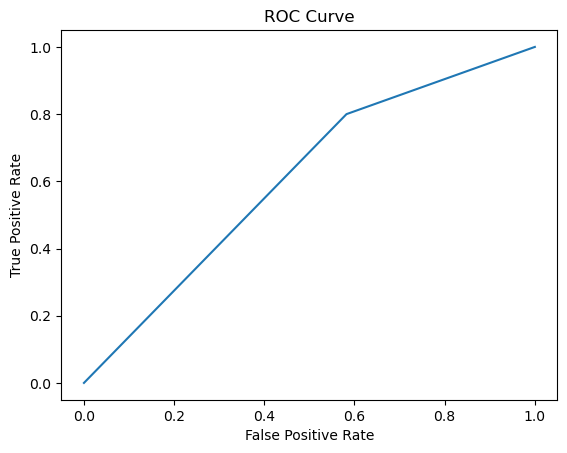

In [79]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Tunning

In [67]:
from sklearn.model_selection import GridSearchCV
tun_dt = [{'criterion':['gini', 'entropy'], 'max_depth':range(1,10), 'min_samples_split': range(1,30)}]
gs_dt = GridSearchCV(DecisionTreeClassifier(), tun_dt, scoring = 'accuracy', cv = 10 )


NameError: name 'DecisionTreeClassifier' is not defined

In [81]:
gs_dt.fit(x_train_scl, y_train_os)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 5220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\base.py", li

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(1, 10),
                          'min_samples_split': range(1, 30)}],
             scoring='accuracy')

In [82]:
gs_dt.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 6}

In [83]:
tune_dt = gs_dt.best_score_
tune_dt

0.8008421985815601

# Random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier()

In [85]:
rmf_mdl = rmf.fit(x_train_scl, y_train_os)
rmf_mdl

RandomForestClassifier()

In [86]:
rmf_y_pred = rmf_mdl.predict(x_test_scl)
rmf_y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0], dtype=uint8)

In [87]:
accuracy_score_rmf = accuracy_score(rmf_y_pred, y_test)
accuracy_score_rmf

0.7554347826086957

In [88]:
cm = confusion_matrix(rmf_y_pred, y_test)

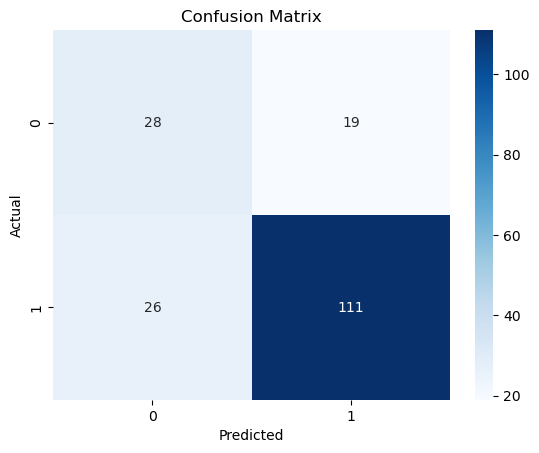

In [89]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [90]:
print(classification_report(rmf_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.52      0.60      0.55        47
           1       0.85      0.81      0.83       137

    accuracy                           0.76       184
   macro avg       0.69      0.70      0.69       184
weighted avg       0.77      0.76      0.76       184



In [92]:
fpr, tpr, _ = roc_curve(rmf_y_pred, y_test)
fpr, tpr, _ 

(array([0.        , 0.40425532, 1.        ]),
 array([0.        , 0.81021898, 1.        ]),
 array([2, 1, 0]))

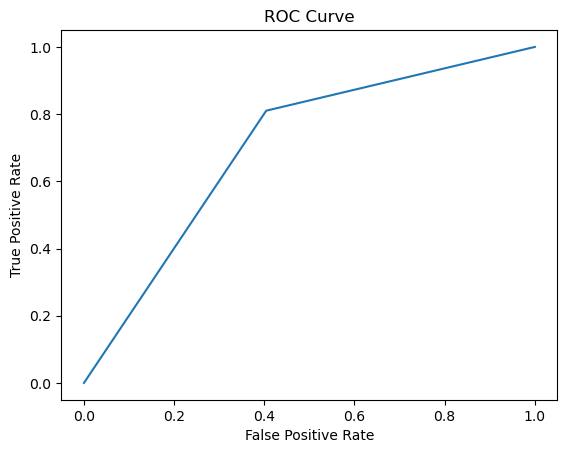

In [93]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### Tunning

In [95]:
rf_tun =  [{'criterion':['gini', 'entropy'], 'max_depth':[5,10,15], 'min_samples_split': range(1,30), 'n_estimators':range(1,10)}]
gs_rf = GridSearchCV(RandomForestClassifier(), rf_tun, scoring='accuracy', cv =10)

In [96]:
gs_rf.fit(x_train_scl, y_train_os)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 15660.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\nikhi\anaconda3\lib\site-pa

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15],
                          'min_samples_split': range(1, 30),
                          'n_estimators': range(1, 10)}],
             scoring='accuracy')

In [97]:
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_split': 3,
 'n_estimators': 9}

In [98]:
tune_rmf = gs_rf.best_score_
tune_rmf

0.8303191489361701

# XGBoost

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [56]:
xgb_mdl = xgb.fit(x_train_scl, y_train_os)

In [57]:
xgb_y_pred = xgb_mdl.predict(x_test_scl)

In [60]:
accuracy_score_xgb = accuracy_score(xgb_y_pred, y_test)
accuracy_score_xgb

0.717391304347826

In [61]:
cm = confusion_matrix(xgb_y_pred, y_test)

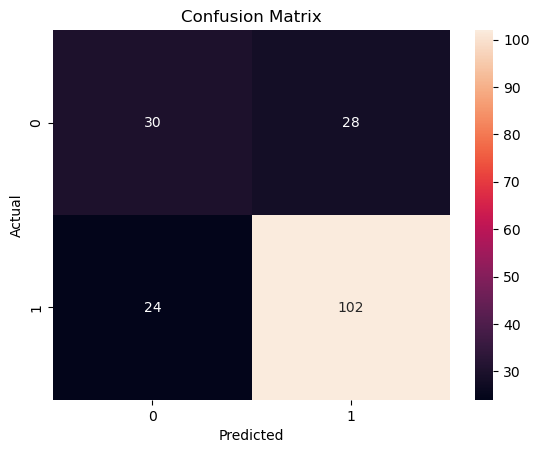

In [62]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
print(classification_report(xgb_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54        58
           1       0.78      0.81      0.80       126

    accuracy                           0.72       184
   macro avg       0.67      0.66      0.67       184
weighted avg       0.71      0.72      0.71       184



In [64]:
fpr, tpr, _ = roc_curve(xgb_y_pred, y_test)
fpr, tpr, _

(array([0.        , 0.48275862, 1.        ]),
 array([0.        , 0.80952381, 1.        ]),
 array([2, 1, 0]))

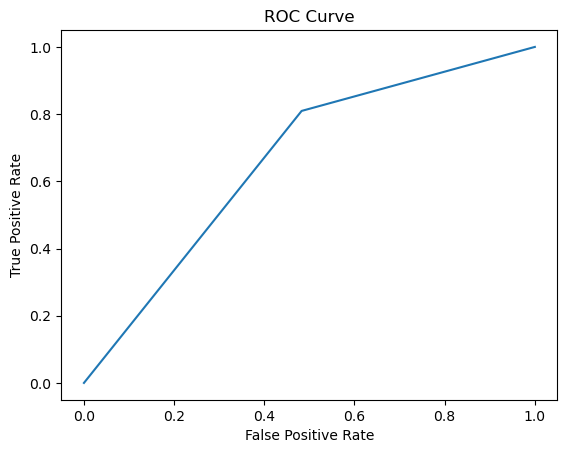

In [65]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### Tunning

In [68]:
tun_xgb = {'learning_rate':[0.1,0.2,0.3], 'max_depth':range(3,7), 'n_estimators':[100,200,300], 'subsample':[0.8,1.0]}
gs_xgb = GridSearchCV(XGBClassifier(), tun_xgb, scoring = 'accuracy', cv = 5)

In [69]:
gs_xgb.fit(x_train_scl, y_train_os)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': range(3, 7),
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [70]:
gs_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

In [71]:
tune_xgb = gs_xgb.best_score_
tune_xgb

0.8426116838487971

# SVM

In [113]:
from sklearn.svm import SVC
svc = SVC()

In [114]:
svc_mdl = svc.fit(x_train_scl, y_train_os)
svc_mdl

SVC()

In [115]:
svc_y_pred = svc_mdl.predict(x_test_scl)
svc_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1], dtype=uint8)

In [116]:
accuracy_score_svm = accuracy_score(svc_y_pred, y_test)
accuracy_score_svm

0.6847826086956522

In [117]:
cm = confusion_matrix(svc_y_pred, y_test)

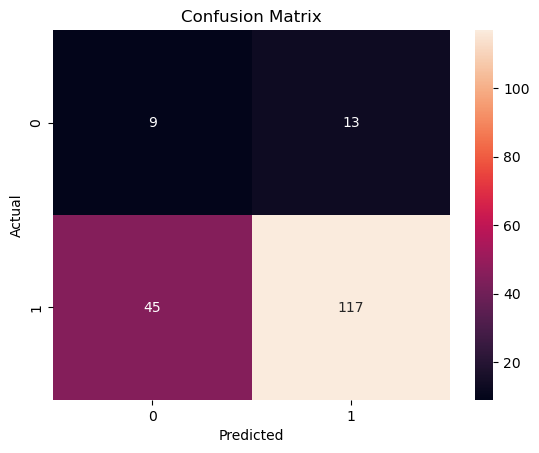

In [118]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [119]:
print(classification_report(svc_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.17      0.41      0.24        22
           1       0.90      0.72      0.80       162

    accuracy                           0.68       184
   macro avg       0.53      0.57      0.52       184
weighted avg       0.81      0.68      0.73       184



In [120]:
fpr, tpr, _ = roc_curve(svc_y_pred, y_test)
fpr, tpr, _

(array([0.        , 0.59090909, 1.        ]),
 array([0.        , 0.72222222, 1.        ]),
 array([2, 1, 0]))

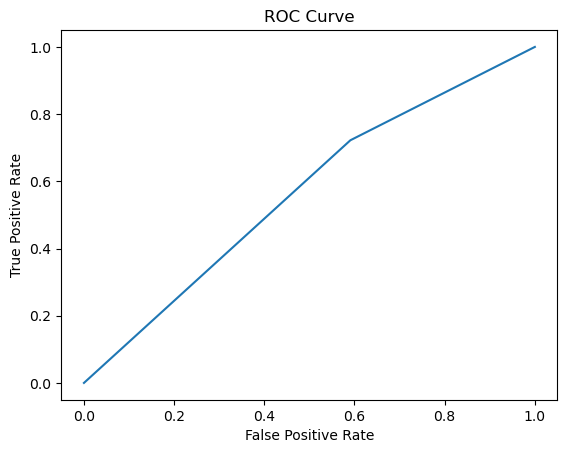

In [123]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Naive Byes

In [124]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [125]:
nb_mdl = nb.fit(x_train_scl, y_train_os)
nb_mdl

GaussianNB()

In [126]:
nb_y_pred = nb_mdl.predict(x_test_scl)
nb_y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0], dtype=uint8)

In [127]:
accuracy_score_nb = accuracy_score(nb_y_pred, y_test)
accuracy_score_nb

0.8206521739130435

In [128]:
cm = confusion_matrix(nb_y_pred, y_test)

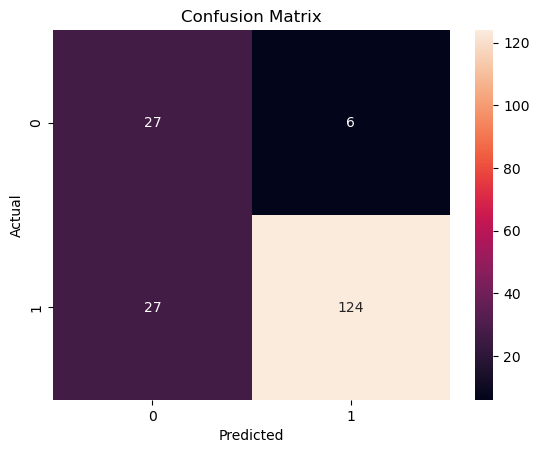

In [129]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [130]:
print(classification_report(nb_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.50      0.82      0.62        33
           1       0.95      0.82      0.88       151

    accuracy                           0.82       184
   macro avg       0.73      0.82      0.75       184
weighted avg       0.87      0.82      0.84       184



In [132]:
fpr, tpr, _ = roc_curve(nb_y_pred, y_test)
fpr, tpr, _

(array([0.        , 0.18181818, 1.        ]),
 array([0.        , 0.82119205, 1.        ]),
 array([2, 1, 0]))

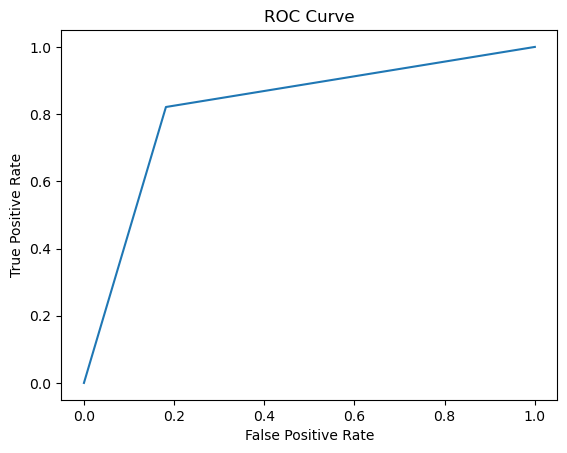

In [134]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [136]:
knn_mdl = nb.fit(x_train_scl, y_train_os)
knn_mdl

GaussianNB()

In [137]:
knn_y_pred = nb_mdl.predict(x_test_scl)
knn_y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0], dtype=uint8)

In [139]:
accuracy_score_knn = accuracy_score(nb_y_pred, y_test)
accuracy_score_knn

0.8206521739130435

In [140]:
cm = confusion_matrix(nb_y_pred, y_test)

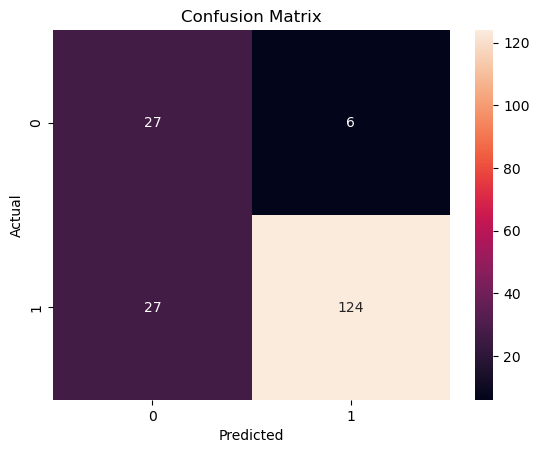

In [141]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [142]:
print(classification_report(nb_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.50      0.82      0.62        33
           1       0.95      0.82      0.88       151

    accuracy                           0.82       184
   macro avg       0.73      0.82      0.75       184
weighted avg       0.87      0.82      0.84       184



In [143]:
fpr, tpr, _ = roc_curve(nb_y_pred, y_test)
fpr, tpr, _ 

(array([0.        , 0.18181818, 1.        ]),
 array([0.        , 0.82119205, 1.        ]),
 array([2, 1, 0]))

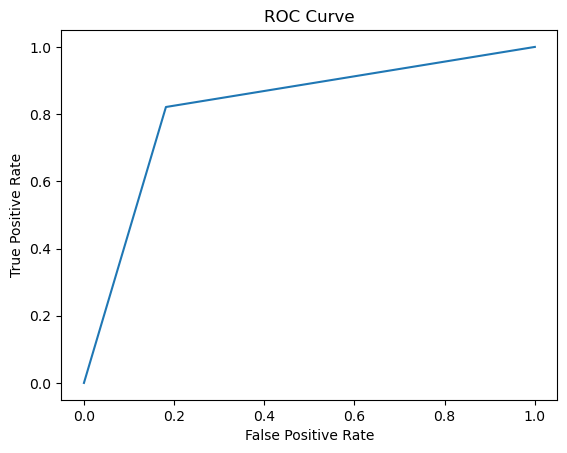

In [144]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# All Model Accuracy

In [146]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Decision Tree",
              "Tune Decision Tree",
              "Random Forest",
              "Tune Random Forest",
              "XG Boost",
              "TuneXG Boost",
              "SVM",
              "Naive Bayes",
              "KNN"],
    "Accuracy score": [accuracy_lor,accuracy_score_dt,tune_dt, accuracy_score_rmf, tune_rmf,
                       accuracy_score_xgb,tune_xgb, accuracy_score_svm, accuracy_score_nb, accuracy_score_knn]
})

print(models)

                 Model  Accuracy score
0  Logistic Regression        0.717391
1        Decision Tree        0.635870
2   Tune Decision Tree        0.800842
3        Random Forest        0.755435
4   Tune Random Forest        0.830319
5             XG Boost        0.728261
6         TuneXG Boost        0.834079
7                  SVM        0.684783
8          Naive Bayes        0.820652
9                  KNN        0.820652


In [147]:

models.sort_values(by="Accuracy score",ascending= False)

,Model,Accuracy score
6,TuneXG Boost,0.834079
4,Tune Random Forest,0.830319
8,Naive Bayes,0.820652
9,KNN,0.820652
2,Tune Decision Tree,0.800842
3,Random Forest,0.755435
5,XG Boost,0.728261
0,Logistic Regression,0.717391
7,SVM,0.684783
1,Decision Tree,0.635870
